<a href="https://colab.research.google.com/github/Mohamed-Amar/EDA-projects/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Column      | Description                                                           |
|-------------|-----------------------------------------------------------------------|
| PassengerId | Unique identifier for each passenger.                                 |
| Survived    | 1 if the passenger survived, 0 if not.                                |
| Pclass      | Economic class: 1 for first, 2 for second, 3 for third                |
| Name        | Passenger's name.                                                     |
| Sex         | Gender of the passenger.                                              |
| Age         | Age of the passenger.                                                 |
| SibSp       | Number of siblings/spouses aboard.                                    |
| Parch       | Number of parents/children aboard.                                    |
| Ticket      | Ticket number.                                                        |
| Fare        | Cost of the ticket.                                                   |
| Cabin       | Cabin number, if available.                                           |
| Embarked    | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). |


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Titanic-Dataset.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# feature selection

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.drop(['PassengerId', 'Name',  'Ticket', 'Cabin'],axis=1,inplace=True)

# cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [ ]:
df.duplicated().sum()

111

In [ ]:
df.drop_duplicates()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [ ]:
for col in ['Survived','Pclass','Sex','Embarked']:
    print(df[col].value_counts(),'\n_______________________________\n')

Survived
0    549
1    340
Name: count, dtype: int64 
_______________________________

Pclass
3    491
1    214
2    184
Name: count, dtype: int64 
_______________________________

Sex
male      577
female    312
Name: count, dtype: int64 
_______________________________

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64 
_______________________________



In [ ]:
(df['Fare']<=0).sum()

15

In [ ]:
df=df[df['Fare']!=0]

In [ ]:
df.shape

(874, 8)

# EDA

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,0.387872,2.318078,29.609063,0.533181,0.389016,32.647539
std,0.487544,0.834243,13.043543,1.110987,0.812090,49.942710
min,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.500000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


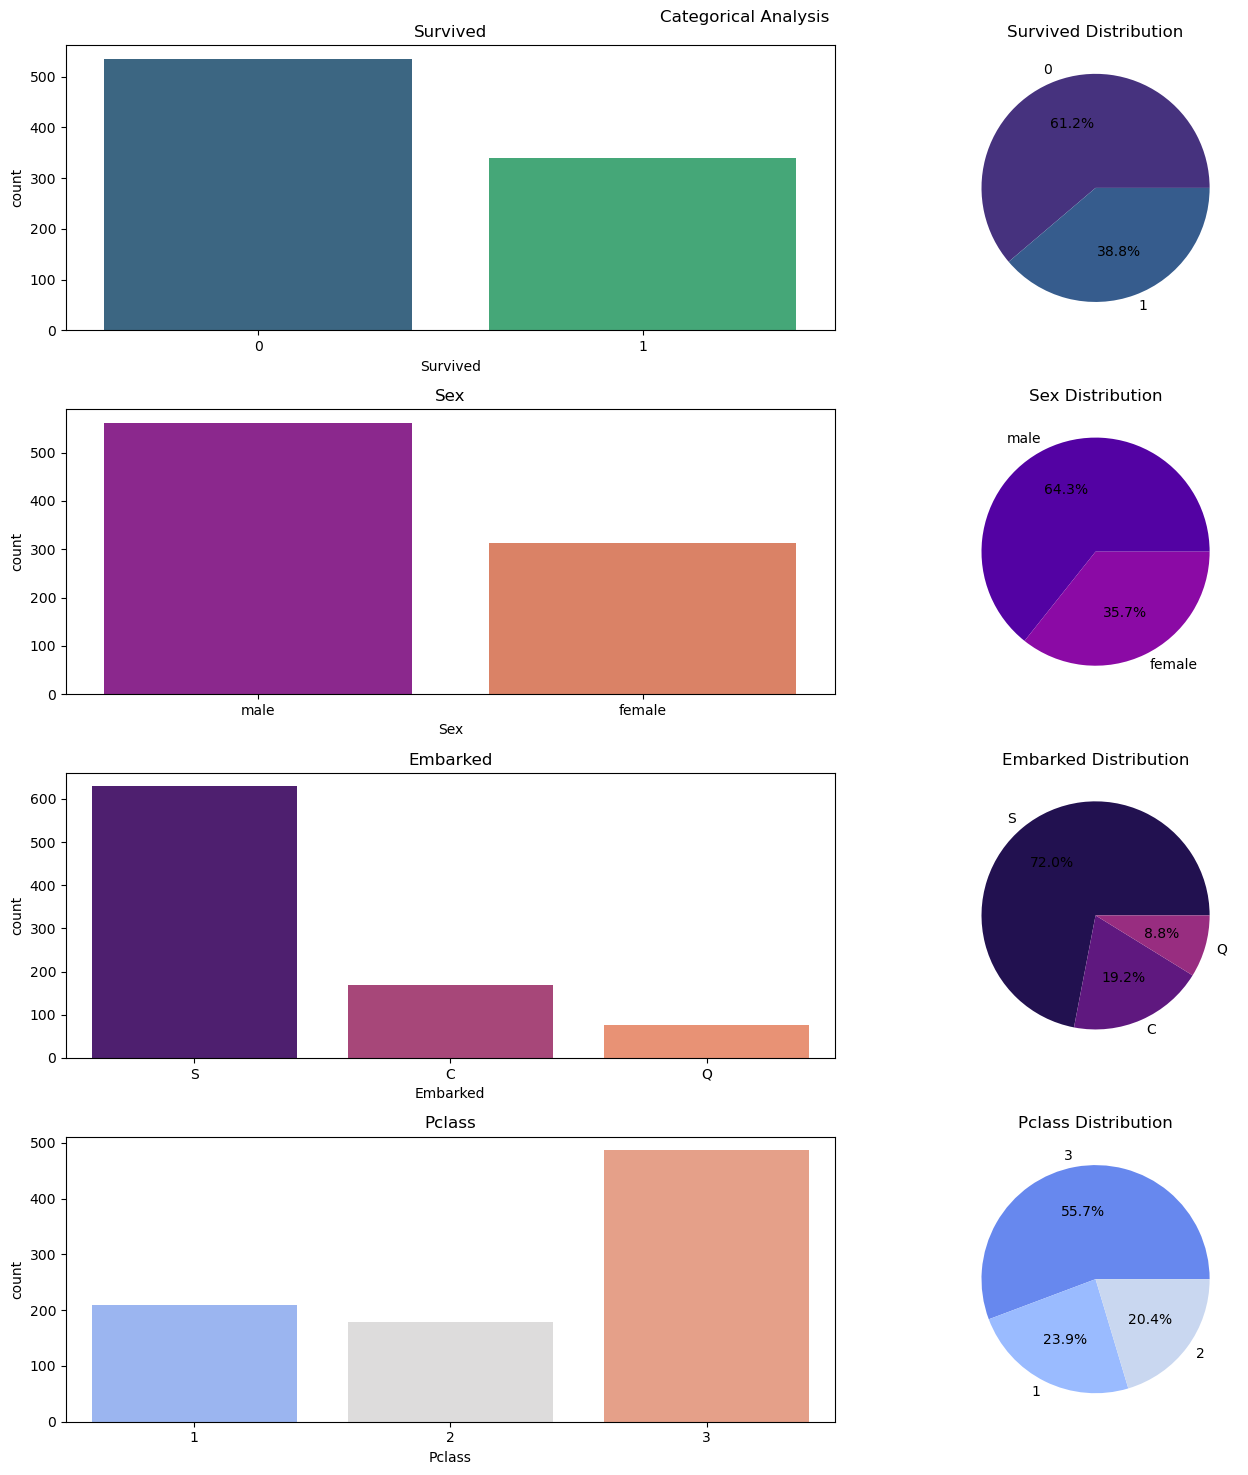

In [ ]:
fig,ax=plt.subplots(4,2,figsize=(15,15))

survived_counts=df['Survived'].value_counts()
sns.barplot(x=survived_counts.index,y=survived_counts,palette='viridis',ax=ax[0,0])
ax[0,0].set_title("Survived")
ax[0,1].pie(survived_counts,labels=survived_counts.index,autopct='%1.1f%%',colors=sns.color_palette("viridis"))
ax[0,1].set_title("Survived Distribution")



Sex_counts=df['Sex'].value_counts()
sns.barplot(x=Sex_counts.index,y=Sex_counts,palette='plasma',ax=ax[1,0])
ax[1,0].set_title("Sex")
ax[1,1].pie(Sex_counts,labels=Sex_counts.index,autopct='%1.1f%%',colors=sns.color_palette("plasma"))
ax[1,1].set_title("Sex Distribution")




Embarked_counts=df['Embarked'].value_counts()
sns.barplot(x=Embarked_counts.index,y=Embarked_counts,palette='magma',ax=ax[2,0])
ax[2,0].set_title("Embarked")
ax[2,1].pie(Embarked_counts,labels=Embarked_counts.index,autopct='%1.1f%%',colors=sns.color_palette("magma"))
ax[2,1].set_title("Embarked Distribution")




Pclass_counts=df['Pclass'].value_counts()
sns.barplot(x=Pclass_counts.index,y=Pclass_counts,palette='coolwarm',ax=ax[3,0])
ax[3,0].set_title("Pclass")
ax[3,1].pie(Pclass_counts,labels=Pclass_counts.index,autopct='%1.1f%%',colors=sns.color_palette("coolwarm"))
ax[3,1].set_title("Pclass Distribution")



fig.suptitle('Categorical Analysis')
plt.tight_layout()
plt.show()

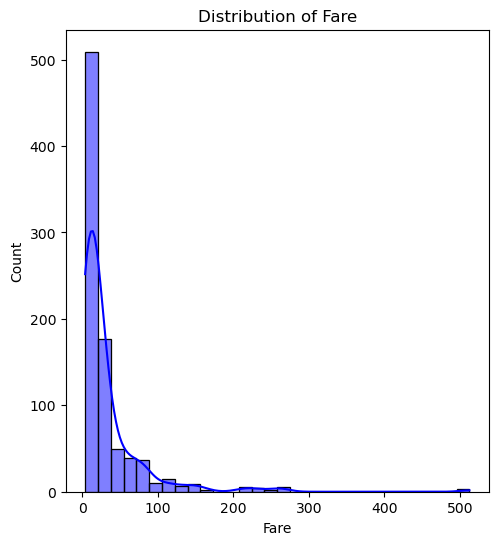

In [ ]:
# Histograms for numerical variables
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Fare'], bins=30, kde=True, color='blue')
plt.title('Distribution of Fare')
plt.show()

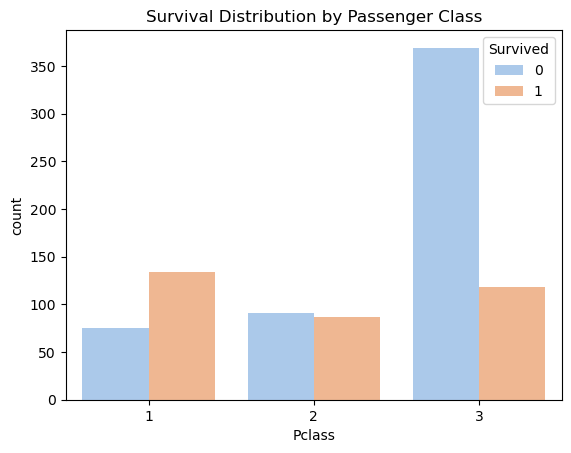

In [ ]:
# Set pastel color palette and plot survival distribution by passenger class
sns.set_palette("pastel")
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Distribution by Passenger Class')
plt.show()


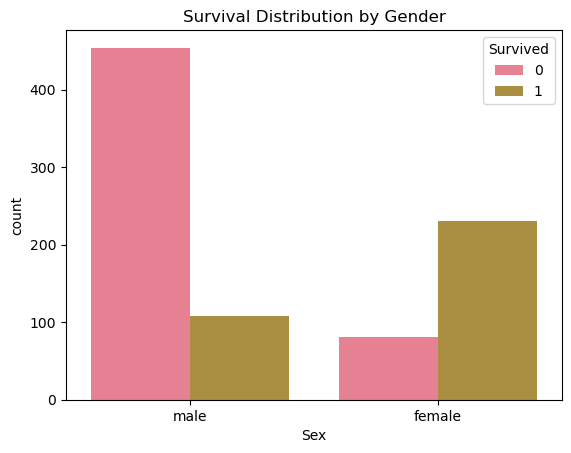

In [ ]:
# Customize color palette and plot survival distribution by gender
sns.set_palette("husl")
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Distribution by Gender')
plt.show()

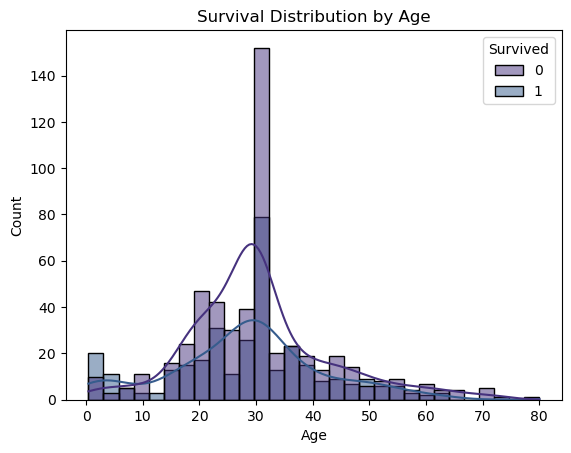

In [ ]:
# Customize color palette and plot survival distribution by age
sns.set_palette("viridis")
sns.histplot(df, x='Age', hue='Survived', kde=True)
plt.title('Survival Distribution by Age')
plt.show()

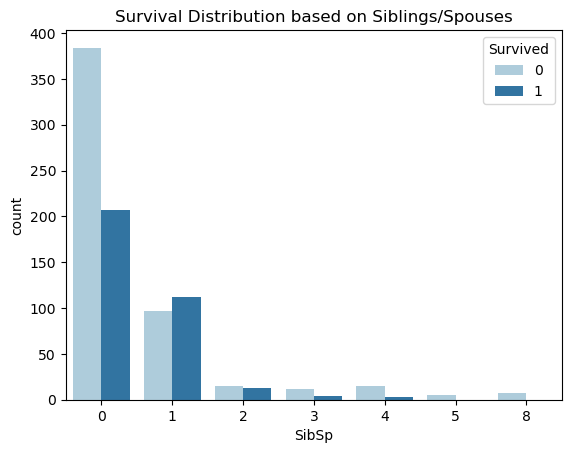

In [ ]:
# Customize color palette and plot survival distribution based on the number of siblings/spouses
sns.set_palette("Paired")
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title('Survival Distribution based on Siblings/Spouses')
plt.show()

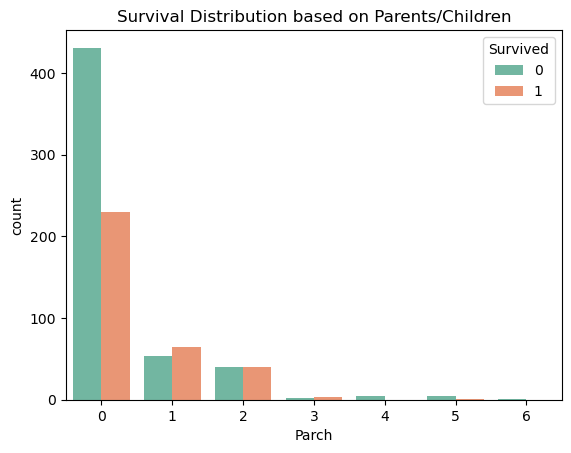

In [ ]:
# Customize color palette and plot survival distribution based on the number of parents/children
sns.set_palette("Set2")
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title('Survival Distribution based on Parents/Children')
plt.show()

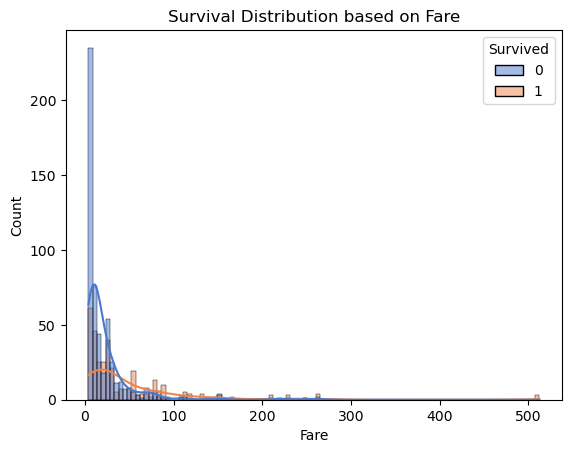

In [ ]:
# Customize color palette and plot survival distribution based on fare
sns.set_palette("muted")
sns.histplot(df, x='Fare', hue='Survived', kde=True)
plt.title('Survival Distribution based on Fare')
plt.show()

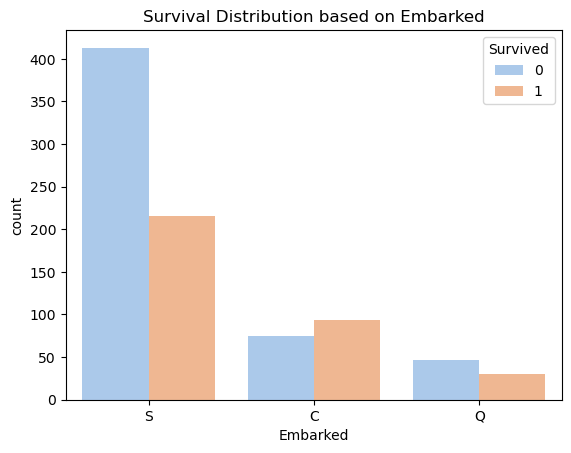

In [ ]:
# Visualize the distribution of embarkation ports for survivors and non-survivors
sns.set_palette("pastel")
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Distribution based on Embarked')
plt.show()

# handel outlines

<function matplotlib.pyplot.show(close=None, block=None)>

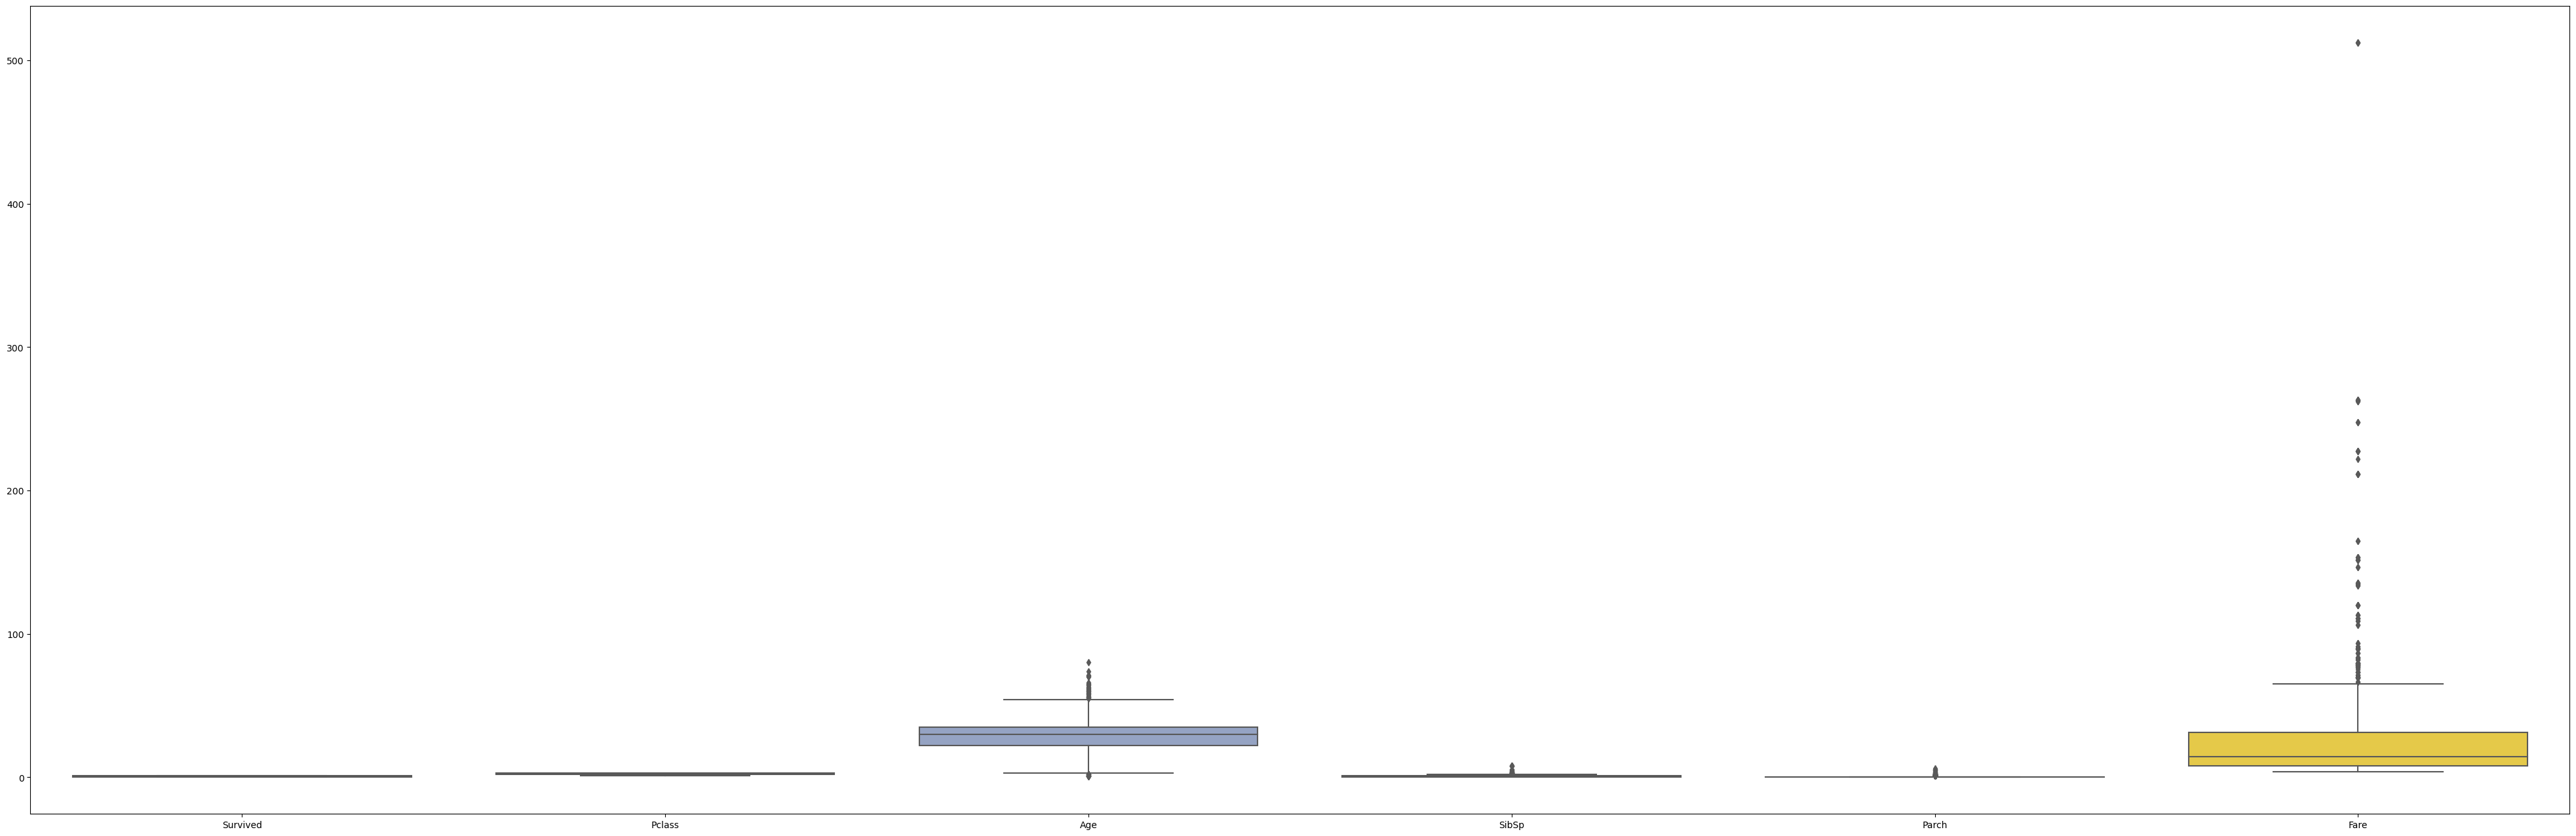

In [ ]:
# Check and handling Outlier
fig, ax = plt.subplots(figsize=(50,16))
sns.boxplot(data=df, orient="v", palette="Set2")
plt.show


In [ ]:
# Remove Outlier
# df_copy = df
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    print("Q1 = ", Q1, " Q3 = ", Q3, " IQR = ", IQR)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Extract all column names as list in Pandas Dataframe
lst_all_cols = df.columns.tolist()
print("lst_all_cols : \n",lst_all_cols)

print("\n")
# Numerical data distribution
print(list(set(df.dtypes.tolist())))
df_num = df.select_dtypes(include = ["float64", "int64"])
lst_num_cols = df_num.columns.tolist()
print("Numerical Data : \n",lst_num_cols)
print("\n")


indx = 0
for col in lst_num_cols:
    print(indx)
    lower_range, upper_range =  remove_outlier(df[col])
    df[col] = np.where(df[col] < lower_range, lower_range, df[col])
    df[col] = np.where(df[col] > upper_range, upper_range, df[col])
    indx = indx +1
    print("-----------------------------")


lst_all_cols : 
 ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


[dtype('int64'), dtype('O'), dtype('float64')]
Numerical Data : 
 ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


0
Q1 =  0.0  Q3 =  1.0  IQR =  1.0
-----------------------------
1
Q1 =  2.0  Q3 =  3.0  IQR =  1.0
-----------------------------
2
Q1 =  22.0  Q3 =  35.0  IQR =  13.0
-----------------------------
3
Q1 =  0.0  Q3 =  1.0  IQR =  1.0
-----------------------------
4
Q1 =  0.0  Q3 =  0.0  IQR =  0.0
-----------------------------
5
Q1 =  7.925  Q3 =  31.275  IQR =  23.349999999999998
-----------------------------


C:\Users\moham\AppData\Local\Temp\ipykernel_9220\2584572712.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] < lower_range, lower_range, df[col])
C:\Users\moham\AppData\Local\Temp\ipykernel_9220\2584572712.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] > upper_range, upper_range, df[col])
C:\Users\moham\AppData\Local\Temp\ipykernel_9220\2584572712.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

<function matplotlib.pyplot.show(close=None, block=None)>

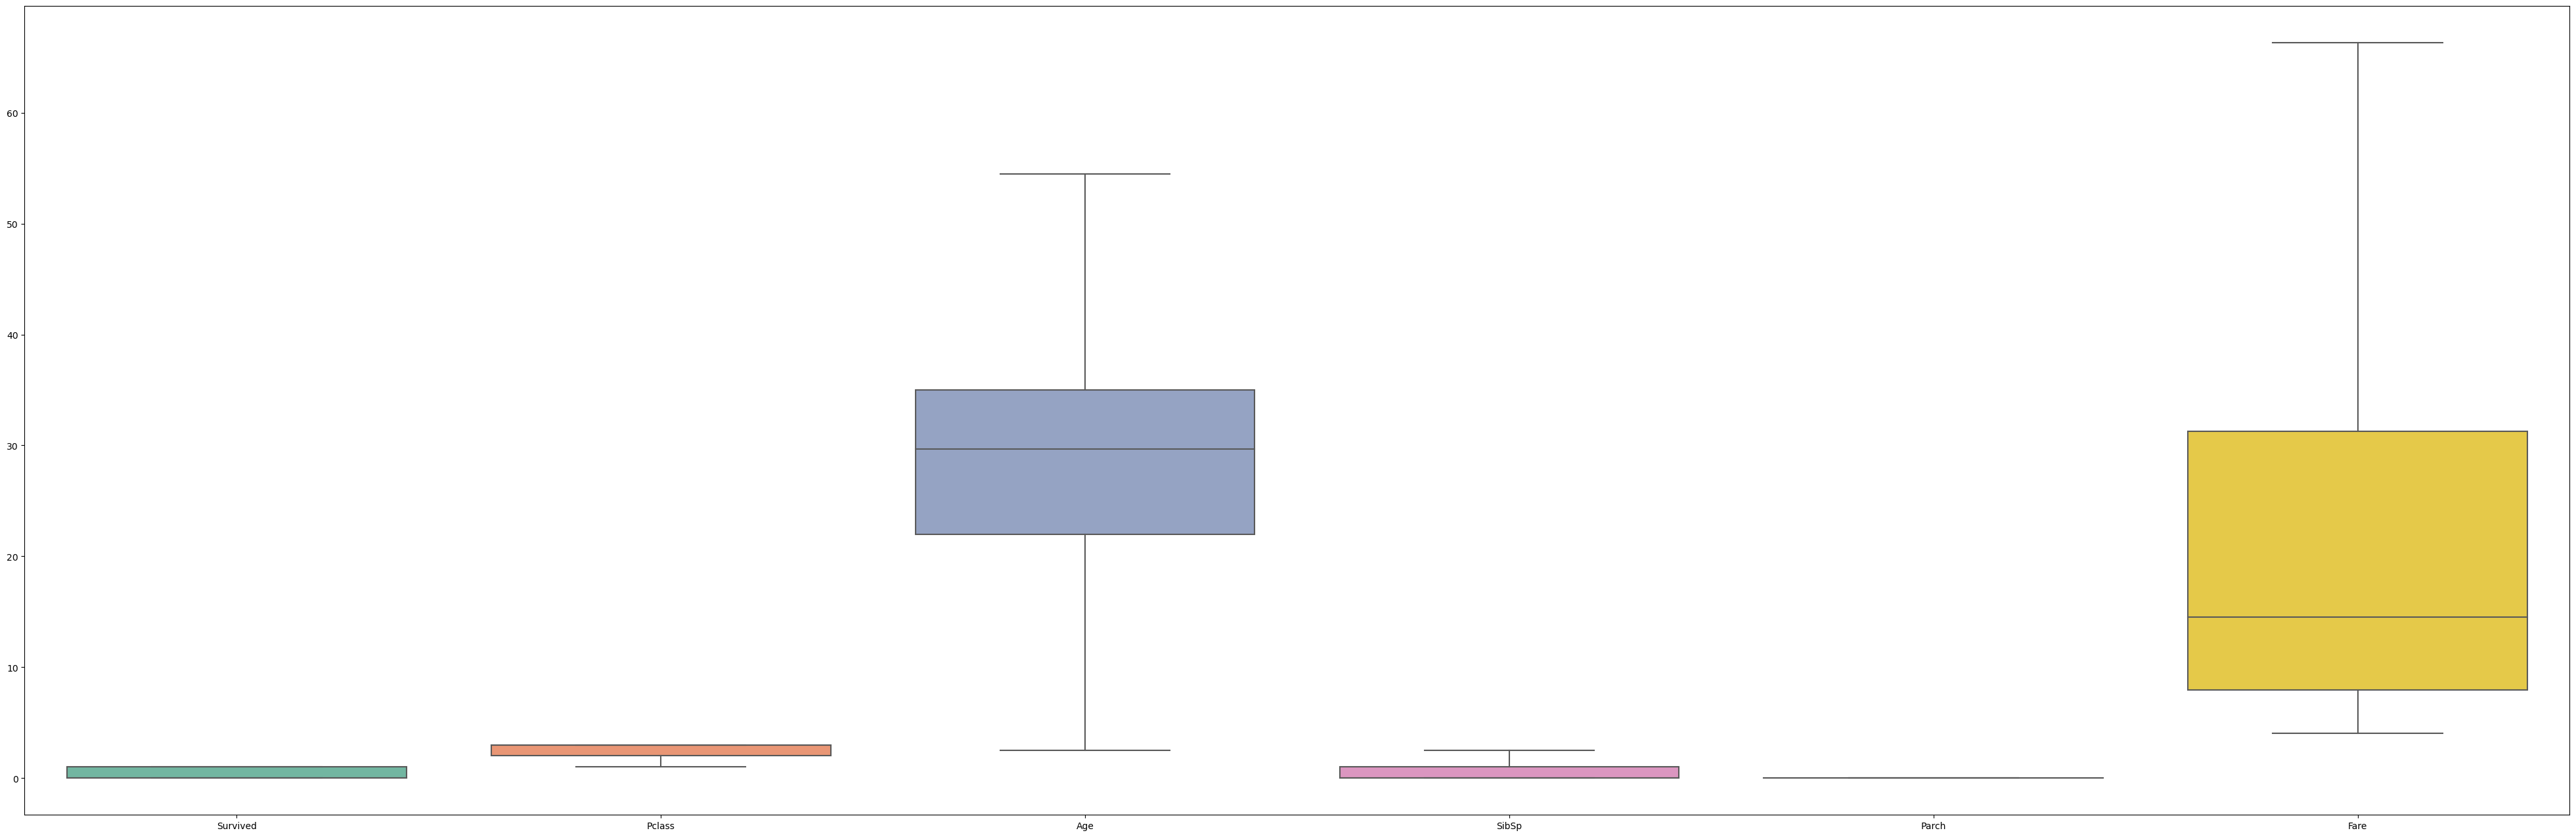

In [ ]:
fig, ax = plt.subplots(figsize=(50,16))
sns.boxplot(data=df, orient="v", palette="Set2")
plt.show

In [ ]:
df.shape

(874, 8)

# Done